In [1]:
# Tasks
# 1. data extraction, column naming, value counts, summary stats, 
# 2. load full data (partial columns, full columns, random sample)
# 3. nlp on body, date counts, usr and msg distinct counts, skip
# 4. figure out what the max col usage is for, and what does each of the filler columns mean
# 5. json extraction

# Data Processing

In [1]:
# Read raw data and load fraction (p) 
INPATH = '/Users/albertorossi/Alberto_Georgetown Dropbox/Alberto Rossi/Gtown/Flowe/0_Data_Codes/0_Raw_Data/part-00000-tid-7073521145656742331-3e06173f-1926-41aa-b3b7-847006329acc-4624-1-c000.csv'
column_names = ['userid', 'event', 'msgid', 'cts', 'body']
import pandas as pd
import random
p =0.05
df = pd.read_csv(INPATH, 
                 error_bad_lines = False, 
                 names = column_names, 
                 nrows = 1000000,
                 skiprows=lambda i: i>0 and random.random() > p
                ) #skiprows = 460953, nrows = 200000)

df = df[1:]

print(df.shape)
df.head()


KeyboardInterrupt



In [10]:
# Cleaning the "Body" json
import json
def clean(x):
    x = x.replace("\\", "")
    x = x.replace("/", "")
    x = x + "}"
    x = x.replace("{", "{\"")
    x = x.replace("\\", "")
    x = x.replace("}", "\"}")
    x = x.replace(": ", ": \"")
    x = x.replace("\"\"", "\"")
    x = x.replace("\"}\"}", "\"}")
    #print(x)
    x = json.loads(x)
    return x

df['body_clean']= df['body'].apply(clean)
df['body_clean']

1         {'deviceCode': 'a44e3f40-511c-452a-99c8-7be335...
2                                     {'rowId': '12212310'}
3         {'deviceCode': 'a070a268-5417-4450-9414-8cf986...
4         {'deviceCode': 'a070a268-5417-4450-9414-8cf986...
5         {'deviceCode': 'a070a268-5417-4450-9414-8cf986...
                                ...                        
923446                  {'transactionId': 'ACLK2107477003'}
923447    {'userId': 'ffa18ab0-c2de-469b-9561-4f062d2660...
923448    {'userId': 'ffa18ab0-c2de-469b-9561-4f062d2660...
923449    {'deviceCode': 'a3a386be-edca-4950-9aed-7267d8...
923450    {'deviceCode': 'a3a386be-edca-4950-9aed-7267d8...
Name: body_clean, Length: 923450, dtype: object

In [11]:
# Converting "body" Json contents into indivisual columns
import pandas as pd
df2 = pd.json_normalize(df['body_clean'])
df3 = df.join(df2)
df3.drop(['body', 'body_clean'], axis = 1, inplace = True)
df3['date'] = pd.to_datetime(df.cts).dt.date
df3['yearmonth'] = pd.to_datetime(df.cts).dt.to_period('M')
df3.head()

/Users/albertorossi/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,userid,event,msgid,cts,deviceCode,rowId,transactionId,message,userId,currentLoyaltyLevel,treeId,nudgeId,loyaltyLevel,cardType,activationAmount,creationDate,product,birthDate,date,yearmonth
1,02542fb7-9ee9-49f9-b17f-e7f6c841c9bb,UserSignedIn,a5e17409-3ac8-4be9-8058-8c0031c14855,2021-12-25T00:17:49.000Z,NaN,12212310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-25,2021-12
2,02650cc5-b4da-483a-96cc-4b6a5119a808,TransactionConfirmed,eaaeef66-26cd-4931-9b33-f6ec7fa1835a,2022-02-08T13:26:15.000Z,a070a268-5417-4450-9414-8cf98682c453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-08,2022-02
3,02650cc5-b4da-483a-96cc-4b6a5119a808,UserSignedIn,b0390b86-e6fb-4f9a-a267-5eafec1ad00b,2022-05-10T10:42:44.000Z,a070a268-5417-4450-9414-8cf98682c453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-10,2022-05
4,02650cc5-b4da-483a-96cc-4b6a5119a808,UserSignedIn,59c8fc3f-9a50-4e3e-9ea1-86d054e9bd53,2022-05-10T10:08:59.000Z,a070a268-5417-4450-9414-8cf98682c453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-10,2022-05
5,02650cc5-b4da-483a-96cc-4b6a5119a808,UserSignedIn,abeedb3a-024f-4be7-866e-491fb1d06ea0,2022-04-22T16:40:38.000Z,NaN,13018019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-22,2022-04


In [5]:
# Storing the data into event types
eventTypes = list(df3.event.value_counts().index)
OUTPATH = '/Users/pranjal/Downloads/'
for i in eventTypes:
    df3[df3.event == i].to_csv(OUTPATH + str(i) + '.csv')
df3.to_csv(OUTPATH + 'cleaned' + '.csv')

# Basic Analytics

In [6]:
# Null Counts
df3.isnull().sum()

userid                     0
event                      0
msgid                      0
cts                       12
message                96758
rowId                  74645
deviceCode             41088
userId                 94284
transactionId          94593
currentLoyaltyLevel    99638
cardType               99956
nudgeId                99317
treeId                 99854
activationAmount       99931
loyaltyLevel           99968
creationDate           99971
product                99986
date                      12
yearmonth                 12
dtype: int64

In [7]:
df3.event.value_counts()

UserSignedIn              58911
TransactionConfirmed      15125
EcoBalanceDataComputed    10229
NudgeCreated               8964
TransactionCreated         5406
NudgeRead                   682
LoyaltyLevelChanged         361
TreeAcquired                145
PhysicalCardRequested        90
SubscriptionActivated        86
Name: event, dtype: int64

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:>

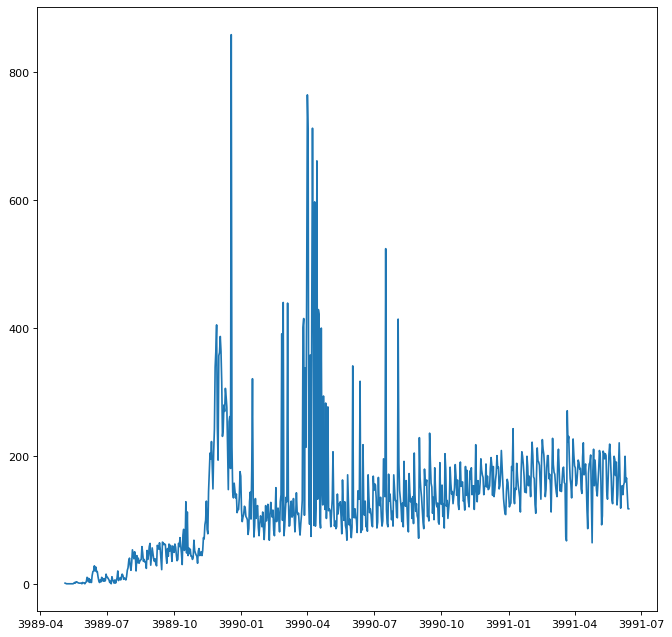

In [9]:
# Events over time
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
import matplotlib.pyplot as plt
df3.date.value_counts().plot()